# Titanic EDA Lab
#### Completed by Jacob Metzger
#### Due 02/08/2016

## Description

For this lab you'll be using the titanic dataset (train.csv).   Your assignment is to create an Exploratory Data Analysis of the Titanic Data.   You may use R or Python to turn in your EDA.


For each variable (except name), you'll need to know at least the following information:   

1.  Is the variable categorical or continuous

2.  Are there missing values?

3. Min, Max, Mean, and Standard Deviation of the continuous variables.

4. Histograms describing the distribution of the variable.

5.  EDA should be completed for these fields:  'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'

If there are other explorations you'd like to include in your EDA, please feel free to do so.  Go where your imagination takes you.

## Main Task

In [1]:
from __future__ import division #for floating division
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.shape

(891, 12)

So we have 891 rows in the dataset and 12 columns.

In [4]:
dataset.head() #A brief sneak peak

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


We can already see that we've got some missing values in the Cabin and Age column, but perhaps there are more elsewhere. For now, let's get some more information to help determine if these variables are continuous or categorical.

In [6]:
pd.DataFrame([(_, dataset[_].value_counts().count()) for _ in dataset.columns])
#This counts the range of values provided for each variable
#Wrapped in DataFrame for easier display in iPython

,0,1
0,PassengerId,891
1,Survived,2
2,Pclass,3
3,Name,891
4,Sex,2
5,Age,88
6,SibSp,7
7,Parch,7
8,Ticket,681
9,Fare,248


Based on the above information, we can see that PassengerID, Name, Age, Ticket, Fare, and Cabin are potential candidates for being categorical variables on consideration of the count alone. However, based on the summaries above we know that Name, Ticket, and Cabin are actually categorical. Survived, Pclass, Sex, and Embarked are also very likely to be categorical variables based on these numbers. SibSp and Parch seem to have a large count for categorical variables, so they may actually be better treated as continuous. Taking a peek at the Kaggle variable descriptions for the dataset validates our suspicions here. So the determinations for question 1 are as follows:

| Variable    | Type        |
|:------------|------------:|
| PassengerID | Continuous  |
| Survived    | Categorical |
| Pclass      | Categorical |
| Name        | Categorical |
| Sex         | Categorical |
| Age         | Continuous  |
| SibSp       | Continuous  |
| Parch       | Continuous  |
| Ticket      | Categorical |
| Fare        | Continuous  |
| Cabin       | Categorical |
| Embarked    | Categorical |

It's also worth noting that some of these categorical variables (Ticket and Cabin) appear to be codes. These could potentially yield interesting continuous variables if decyphered.

In [7]:
pd.DataFrame(dataset.count(), columns=["Count"])

,Count
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


Based on this, we can see that we appear to be missing values in a few categories, which answers question 2. Let's pick out those categories.

In [8]:
pd.DataFrame([_ for _ in dataset.columns if dataset[_].count()<dataset.shape[0]], columns=["Attributes"])

,Attributes
0,Age
1,Cabin
2,Embarked


These are precisely the three that looked to be missing values from the above table. Now let's get some additional information about our numeric variables.

In [9]:
dataset.describe() #this skips over variables with string data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We know that not all of these are continuous variables, but here we can see meaningful information for PassengerID, Age, SibSb, Parch, and Fare answering question 3. The values for PassengerID are trivial given our expectations, but it nonetheless doesn't raise any suspicion with the data (for example, possible skipped ID's and such). The values for Survived and Pclass may be interesting under certain interpretations.

### Histograms

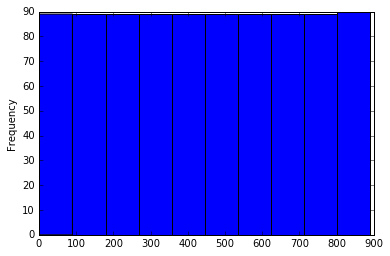

In [10]:
dataset.PassengerId.plot(kind='hist') #Histogram for continuous PassengerId

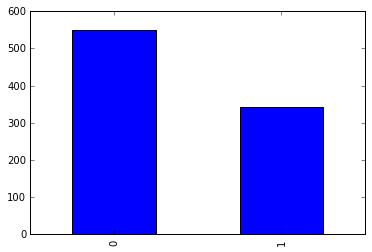

In [11]:
dataset.Survived.value_counts().plot(kind='bar') #Histogram for categorical Survived

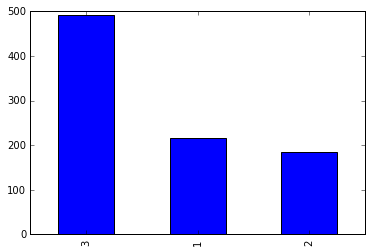

In [12]:
dataset.Pclass.value_counts().plot(kind='bar') #Histogram for categorical Pclass

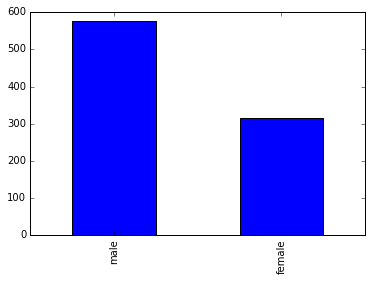

In [13]:
dataset.Sex.value_counts().plot(kind='bar') #Histogram for categorical Sex

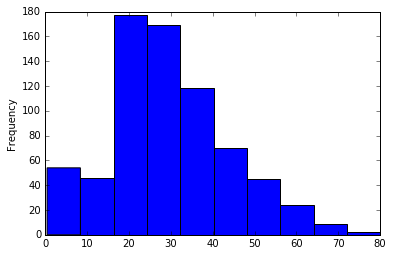

In [14]:
dataset.Age.plot(kind='hist') #Histogram for continuous Age

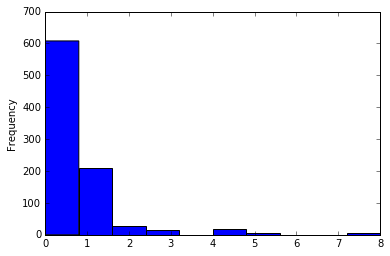

In [15]:
dataset.SibSp.plot(kind='hist') #Histogram for continuous SibSp

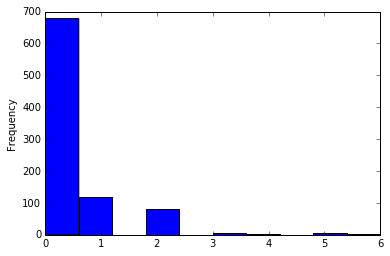

In [16]:
dataset.Parch.plot(kind='hist') #Histogram for continuous Parch

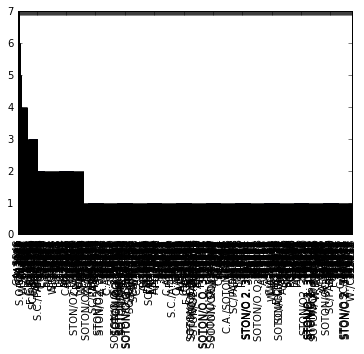

In [17]:
dataset.Ticket.value_counts().plot(kind='bar') #Histogram for categorical Ticket

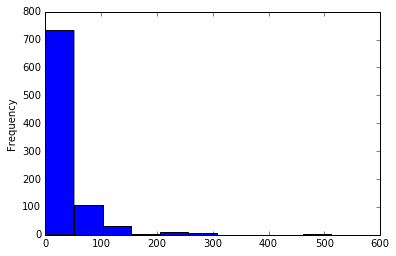

In [18]:
dataset.Fare.plot(kind='hist') #Histogram for continuous Fare

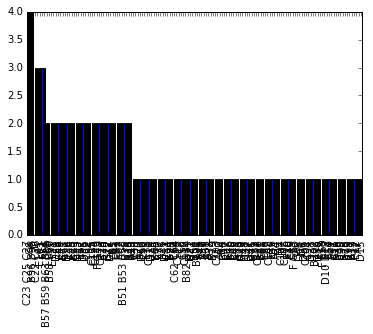

In [19]:
dataset.Cabin.value_counts().plot(kind='bar') #Histogram for categorical Cabin

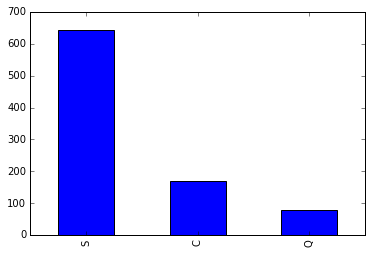

In [20]:
dataset.Embarked.value_counts().plot(kind='bar') #Histogram for categorical Embarked

## Additional Exploration

Some of the other data present in the set potentially contains interesting information not yet covered. The Name variable was not required in the above EDA, but I thought it might be interesting to parse out the titles of the names and take a peek, since this may convey information about profession or marital status (for women). 

### Exploring Name via NamePrefix

In [21]:
nameSplit = [_.split(",") for _ in dataset.Name] #split the last name from the rest of the name
lastName = [_[0] for _ in nameSplit] #get the last names
namePrefix = [_[1].split(" ")[1] for _ in nameSplit] #get the name prefix (Mr, Mrs, etc). Can indicate marital status (Miss, Master, etc)

In [22]:
dataset = pd.concat([dataset, pd.DataFrame(namePrefix, columns=["NamePrefix"])], axis=1)


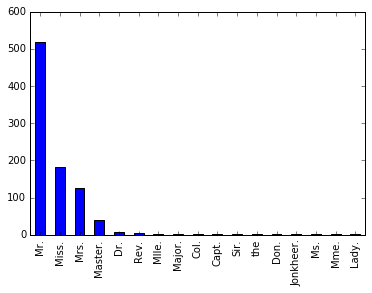

In [23]:
dataset.NamePrefix.value_counts().plot(kind='bar')

'the' is an odd title, so let's track down that passenger. It's unlikely to be meaningful, but I'm curious.

In [24]:
dataset[dataset.NamePrefix=='the']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NamePrefix
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33,0,0,110152,86.5,B77,S,the


So, this piece of data for the countess looks like it was entered oddly, but it's an interesing take-away. So in addition to the usual Mr. and Miss./Mrs., we have Master (which I suspect is for young male children) and a handful of other professional/status titles. Let's confirm the age distribution for some of these titles for young males and young females.

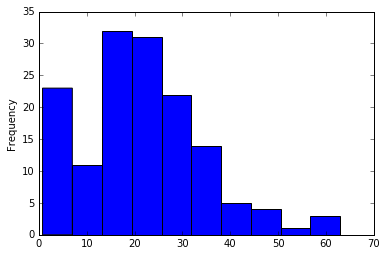

In [25]:
dataset[(dataset.Sex=='female') & (dataset.NamePrefix=='Miss.')].Age.plot(kind='hist')

And to contrast this with the women with other prefixes:

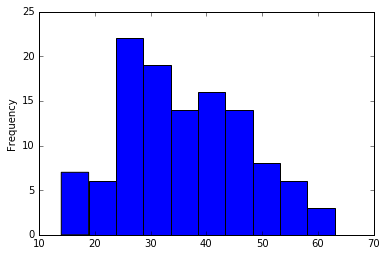

In [26]:
dataset[(dataset.Sex=='female')&(dataset.NamePrefix!='Miss.')].Age.plot(kind='hist')

So we can see that to some degree the age-based assumption for the titles of young women holds out (see the chart below 20's), though there's certainly not a cutoff. Now, let's see if we get the same for the young males.

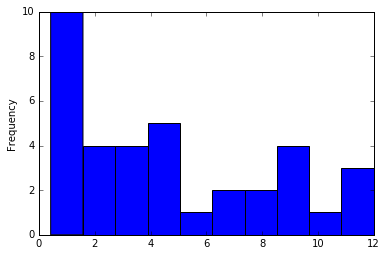

In [27]:
dataset[(dataset.Sex=='male')&(dataset.NamePrefix=='Master.')].Age.plot(kind='hist')

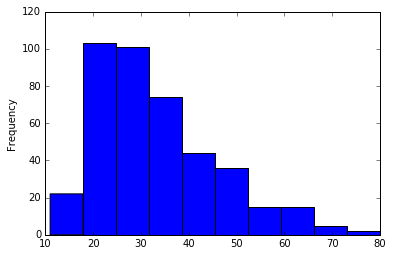

In [28]:
dataset[(dataset.Sex=='male')&(dataset.NamePrefix!='Master.')].Age.plot(kind='hist')

This result is even stronger. It looks like all of the 'Master' titles are given to young males under the age of 12, which is not the general trend for other male titles.

### Exploring Cabin

The Ticket and Cabin data is a bit more complex. We can more-or-less cut these up using the following:

In [29]:
cabinSplit = [str(_).split(" ") for _ in dataset.Cabin] #tokenize the cabins
cabinsFinalSplit = [[cabin if cabin=="nan" else [cabin[0],cabin[1:]] for cabin in cabins] for cabins in cabinSplit] 
#for each cabin code, split off the first letter from the rest (possible future use)
#maybe take a look at at a map?

#Let's count the number of cabins per passenger
numCabins = ["?" if _[0]=="nan" else _.__len__() for _ in cabinsFinalSplit ]
dataset = pd.concat([dataset, pd.DataFrame(numCabins, columns=["NumCabins"])], axis=1)

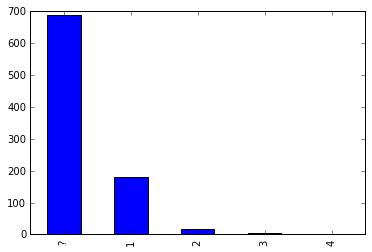

In [30]:
dataset.NumCabins.value_counts().plot(kind='bar')

From this, we can see that we're missing a lot of cabin data (as also shown previously). However, we can see that, as might be expected, a plurality of the positive data we have indicates passengers had one cabin. Let's see how this might relate to fare.

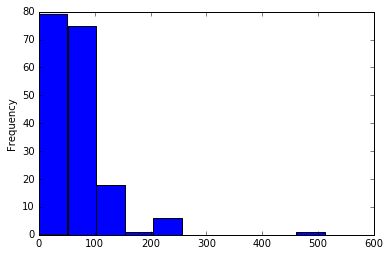

In [31]:
dataset[dataset.NumCabins==1].Fare.plot(kind='hist')

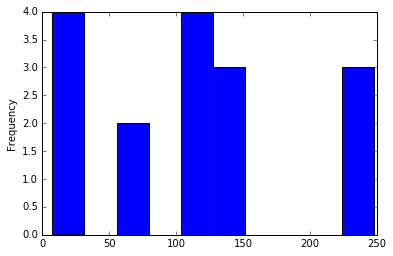

In [32]:
dataset[dataset.NumCabins==2].Fare.plot(kind='hist')

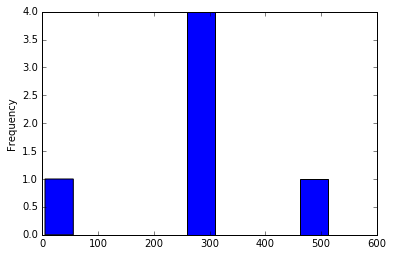

In [33]:
dataset[dataset.NumCabins==3].Fare.plot(kind='hist')

The general trend is what may be expected -- fare price appears to increase wih the number of cabins. Let's see how this compares with Survived.

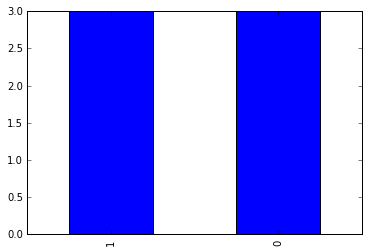

In [34]:
dataset[dataset.NumCabins==3].Survived.value_counts().plot(kind='bar')

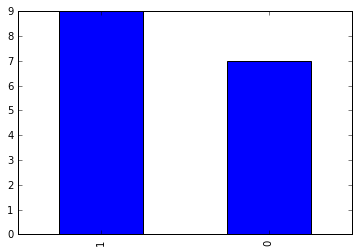

In [35]:
dataset[dataset.NumCabins==2].Survived.value_counts().plot(kind='bar')

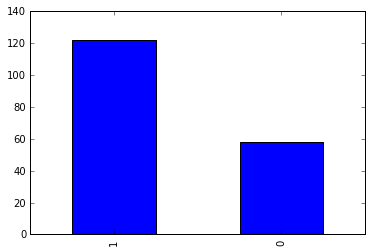

In [36]:
dataset[dataset.NumCabins==1].Survived.value_counts().plot(kind='bar')

It looks like there may be a negative relationship between the number of cabins and survival. Let's see if there might be something interesting in the actual cabin letters, as opposed to the cabin count:

In [37]:
cabinLetters = ["None" if cabin[0]=="nan" else cabin[0][0] for cabin in cabinsFinalSplit]
dataset=pd.concat([dataset,
               pd.DataFrame(cabinLetters, columns=["CabinLetters"])],
              axis=1)

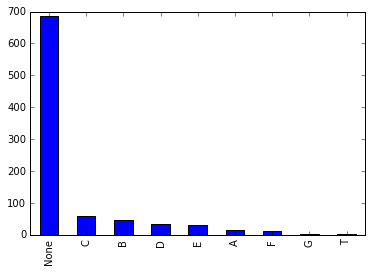

In [38]:
dataset.CabinLetters.value_counts().plot(kind='bar')

The Nones are due to the fact that we're missing a lot of values for Cabin, but let's focus on the other values.

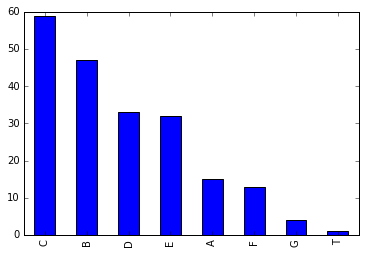

In [39]:
dataset[dataset.CabinLetters!='None'].CabinLetters.value_counts().plot(kind='bar')

Let's see how these may be related to survival.

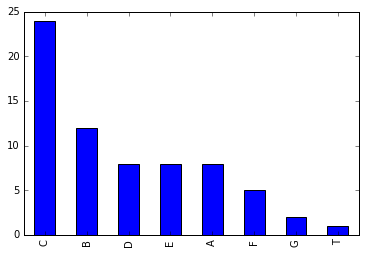

In [40]:
dataset[(dataset.CabinLetters!='None')&(dataset.Survived==0)].CabinLetters.value_counts().plot(kind='bar')

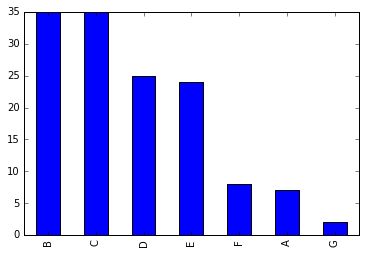

In [41]:
dataset[(dataset.CabinLetters!='None')&(dataset.Survived==1)].CabinLetters.value_counts().plot(kind='bar')

It looks like there are some differences in survival between the B and C cabins, and in proportion to the other cabins, D and E seem to do very well. Note that T does not appear in this second graph. This is because it had no survivors.

In [42]:
nonsurvivors=dataset[(dataset.CabinLetters!='None')&(dataset.Survived==0)].CabinLetters.value_counts()
survivors=dataset[(dataset.CabinLetters!='None')&(dataset.Survived==1)].CabinLetters.value_counts()
zippedvals = zip(survivors, nonsurvivors)
[a/b for (a,b) in zippedvals] #Note, this is in the order of the first graph

[(key, survivors[key]/nonsurvivors[key]) if key !='T' else (key, 'None') for key in nonsurvivors.keys()]

[('C', 1.4583333333333333),
 ('B', 2.9166666666666665),
 ('D', 3.125),
 ('E', 3.0),
 ('A', 0.875),
 ('F', 1.6000000000000001),
 ('G', 1.0),
 ('T', 'None')]

Here, we can see that indeed cabins B, D, and E look to have a comparatively high rate of survival. Because of the low counts of A, F, G, and T, we may suspect that they're really near to the survival rate of C, or in any rate sufficiently different from B, D, and E.

### Exploring Ticket

In [43]:
ticketsSplit = [_.split(" ") for _ in dataset.Ticket] #split the ticket codes into prefix and number
ticketNumbers = [int(_[-1]) if _[-1]!='LINE' else 0 for _ in ticketsSplit] 
#get just the ticket numbers
#There's an oddball at ticket 474 in which the ticket number has three parts, and another ticket code that just reads 'LINE'.
#Here I elect to treat the latter as a prefix.
ticketPrefix = [_[0] if _.__len__()>1 else "None" for _ in ticketsSplit] #just get ticket prefixes

In [44]:
dataset=pd.concat([dataset,
               pd.DataFrame(ticketPrefix, columns=["TicketPrefix"]),
               pd.DataFrame(ticketNumbers, columns=["TicketNumber"])],
              axis=1)

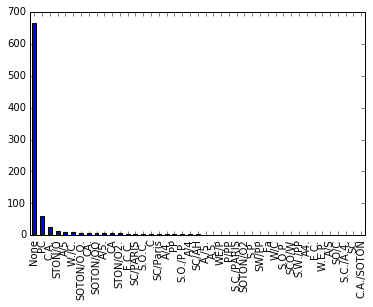

In [45]:
dataset.TicketPrefix.value_counts().plot(kind='bar')

We can see that a vast majority of tickets didn't have these ticket prefixes to their ticket codes.

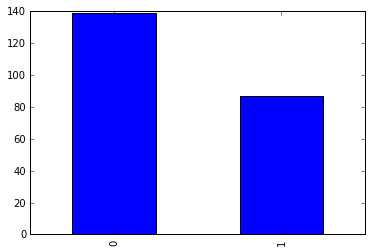

In [46]:
dataset[dataset.TicketPrefix!='None'].Survived.value_counts().plot(kind='bar')

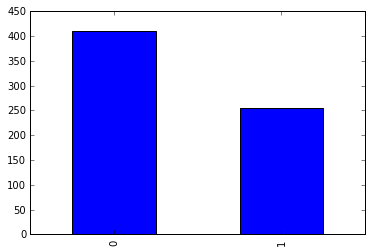

In [47]:
dataset[dataset.TicketPrefix=='None'].Survived.value_counts().plot(kind='bar')

Superficially, it doesn't look like these ticket prefixes have much to do with survival, which makes sense, but it was worth a look. 

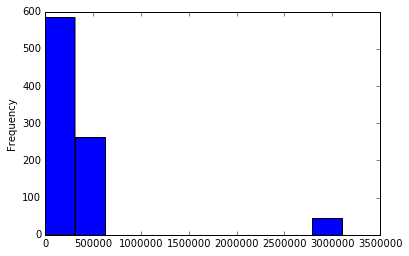

In [48]:
dataset.TicketNumber.plot(kind='hist')

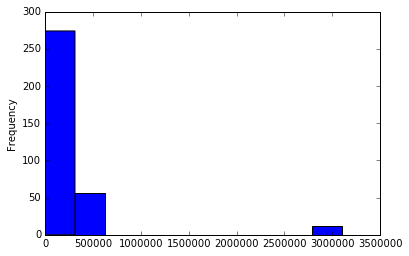

In [49]:
dataset[dataset.Survived==1].TicketNumber.plot(kind='hist')

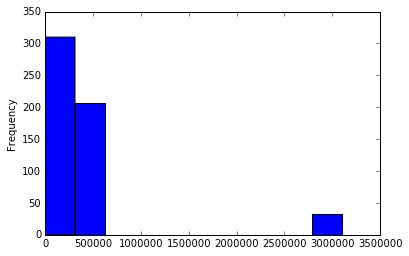

In [50]:
dataset[dataset.Survived==0].TicketNumber.plot(kind='hist')

It looks like there may be some relationship between ticket number and survival, but this may be due to artifacts of how we're parsing the ticket. To compare, let's just look at the tickets without prefixes.

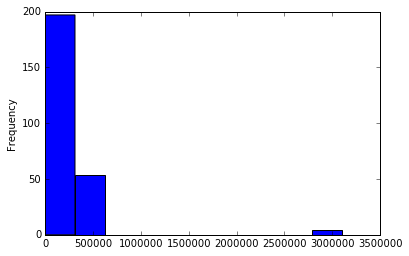

In [51]:
dataset[(dataset.TicketPrefix=='None')&(dataset.Survived==1)].TicketNumber.plot(kind='hist')

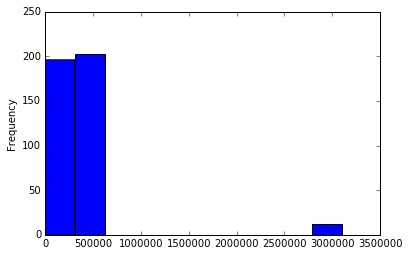

In [52]:
dataset[(dataset.TicketPrefix=='None')&(dataset.Survived==0)].TicketNumber.plot(kind='hist')

So, it does look like ticket number shows something interesting about survival, at least for the majority of tickets -- if you did not survive and you had a ticket without a special prefix, it is more likely that it was a relatively high ticket number compared to a similar survivor.